<a href="https://colab.research.google.com/github/noran97/Driver-Drowsiness-Alert-System-with-Lane-Detection/blob/main/model/Yolo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO
from IPython.display import display , Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/78.2 GB disk)


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/runs/detect/predict/getty_517194189_373099.jpg' # it will download the image and the modelthen it will do the prediction

100% 6.25M/6.25M [00:00<00:00, 350MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 834, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 565, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = g

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True


100% 49.7M/49.7M [00:00<00:00, 88.0MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drive-Drowsiness-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
from IPython.display import display , Image
from IPython import display
display.clear_output()

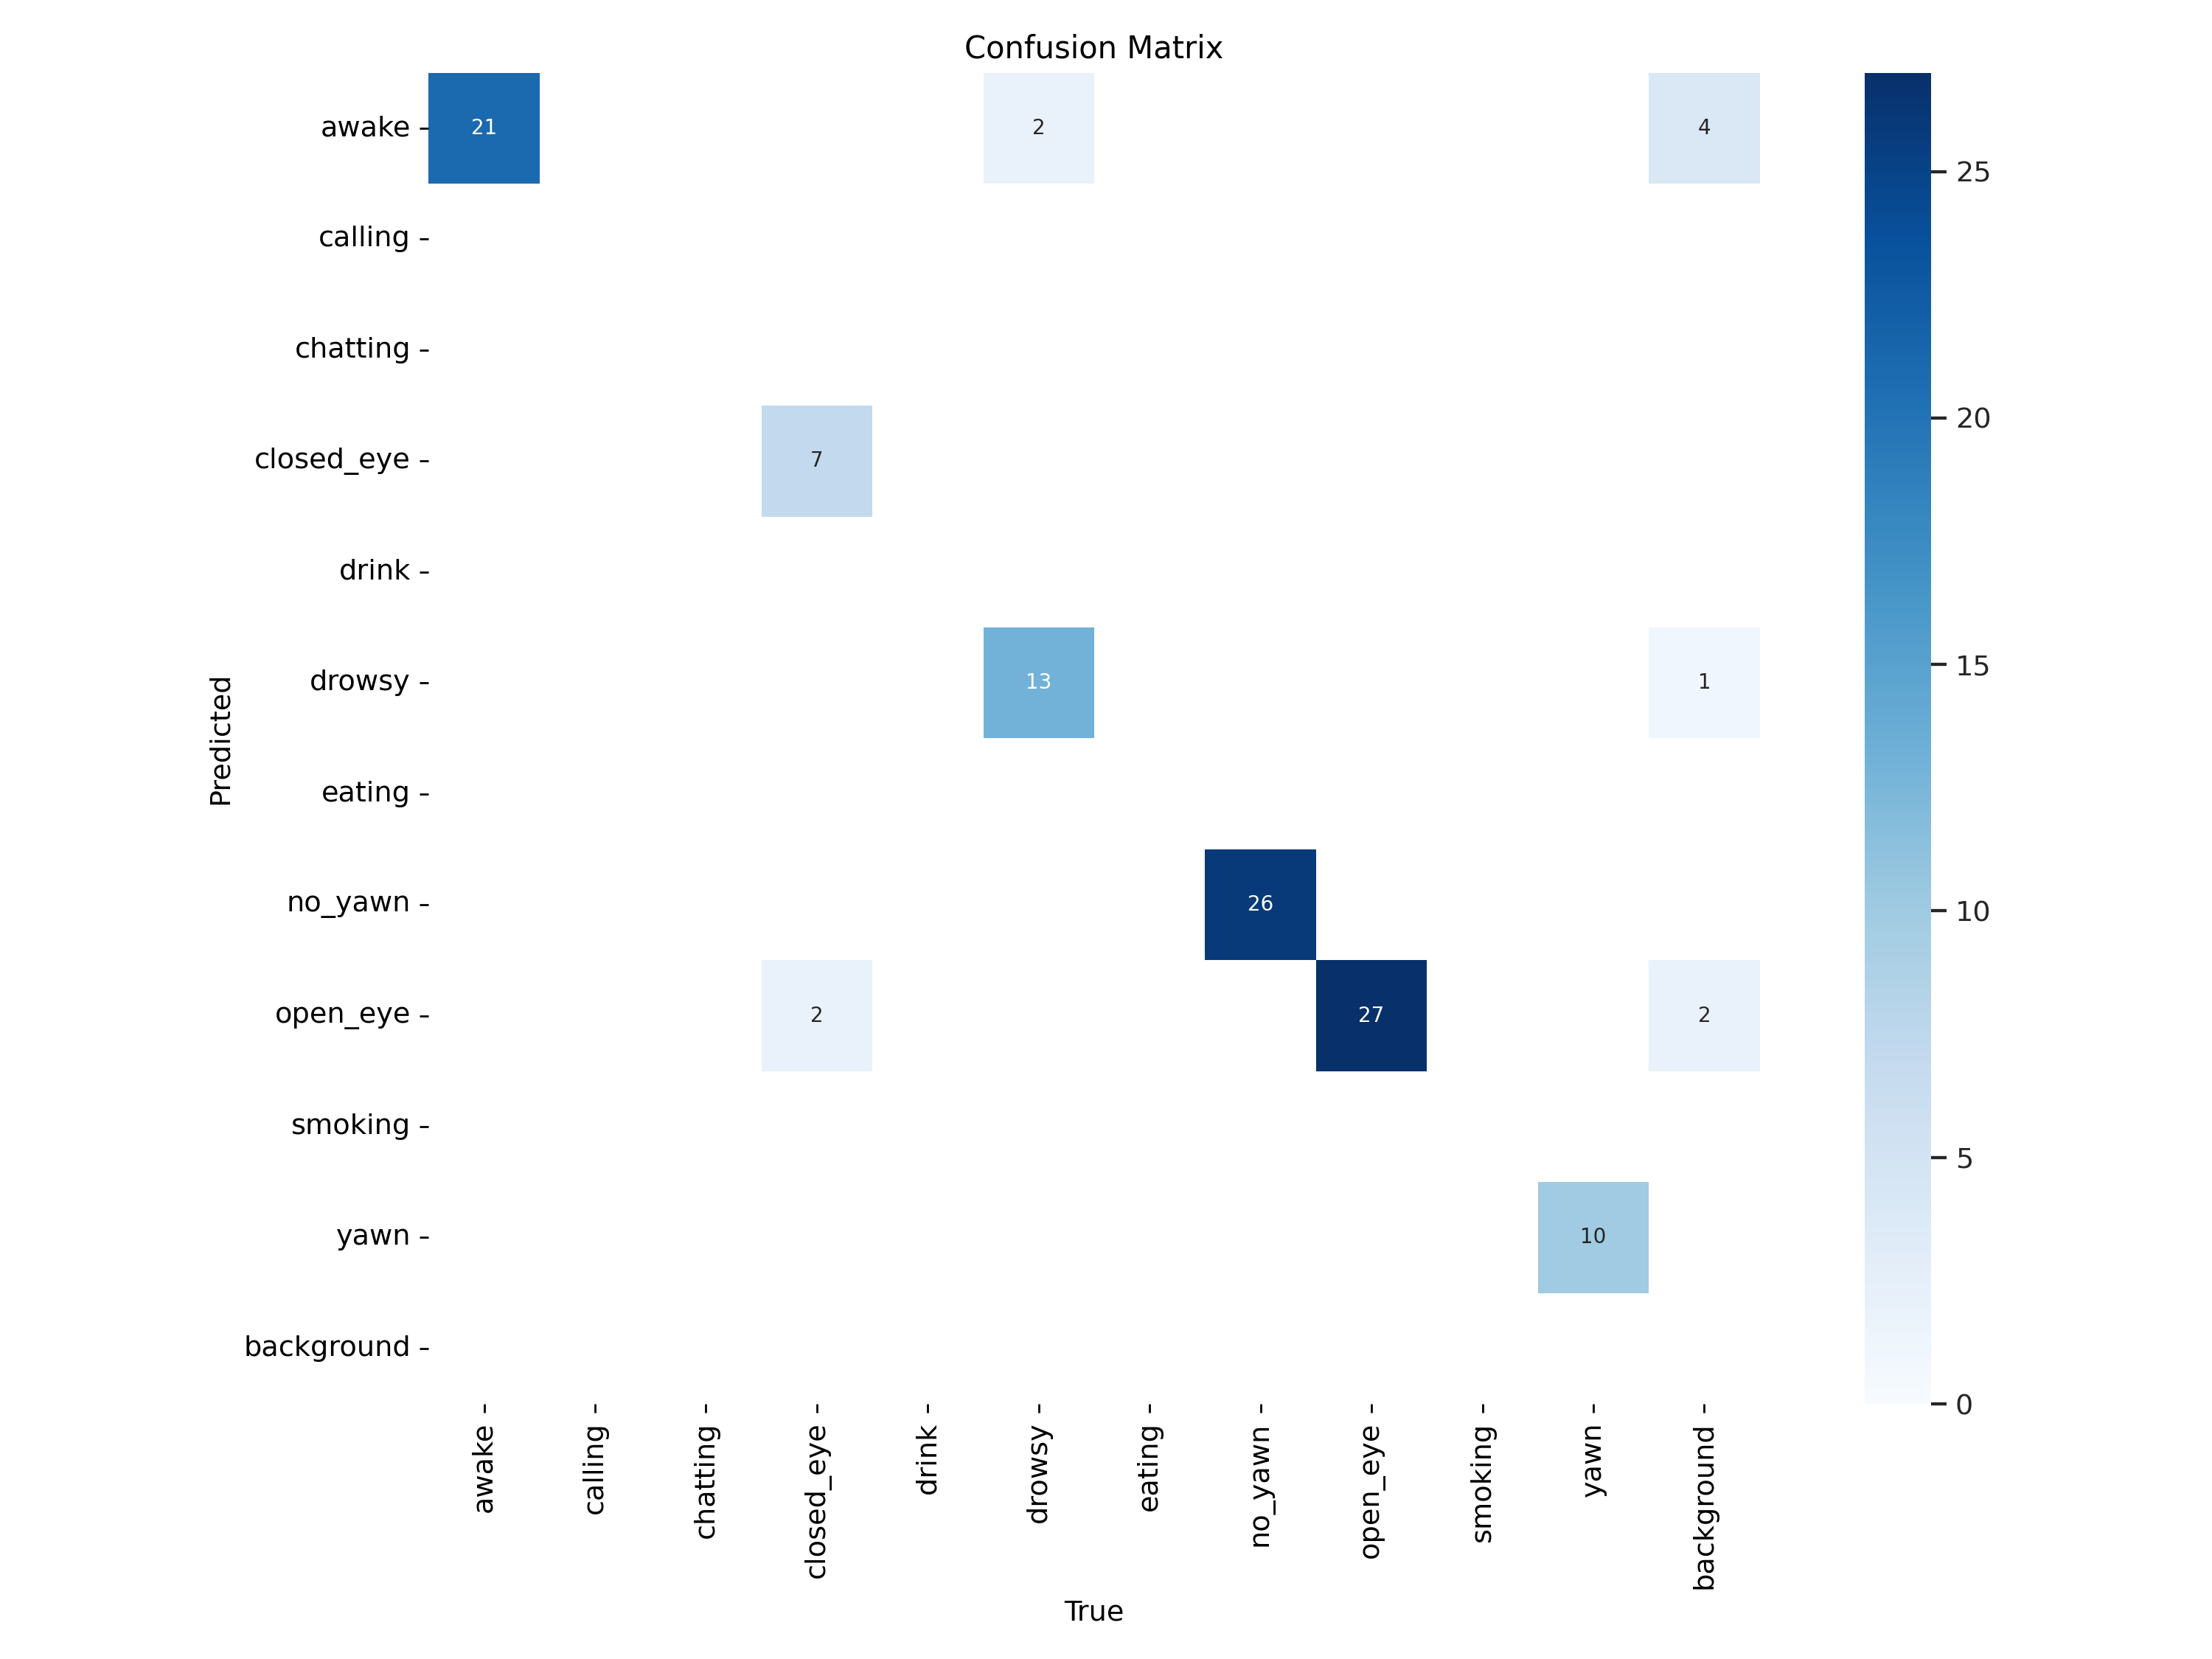

In [ ]:
Image(filename = f'/content/runs/detect/train/confusion_matrix.png' , height = 600)


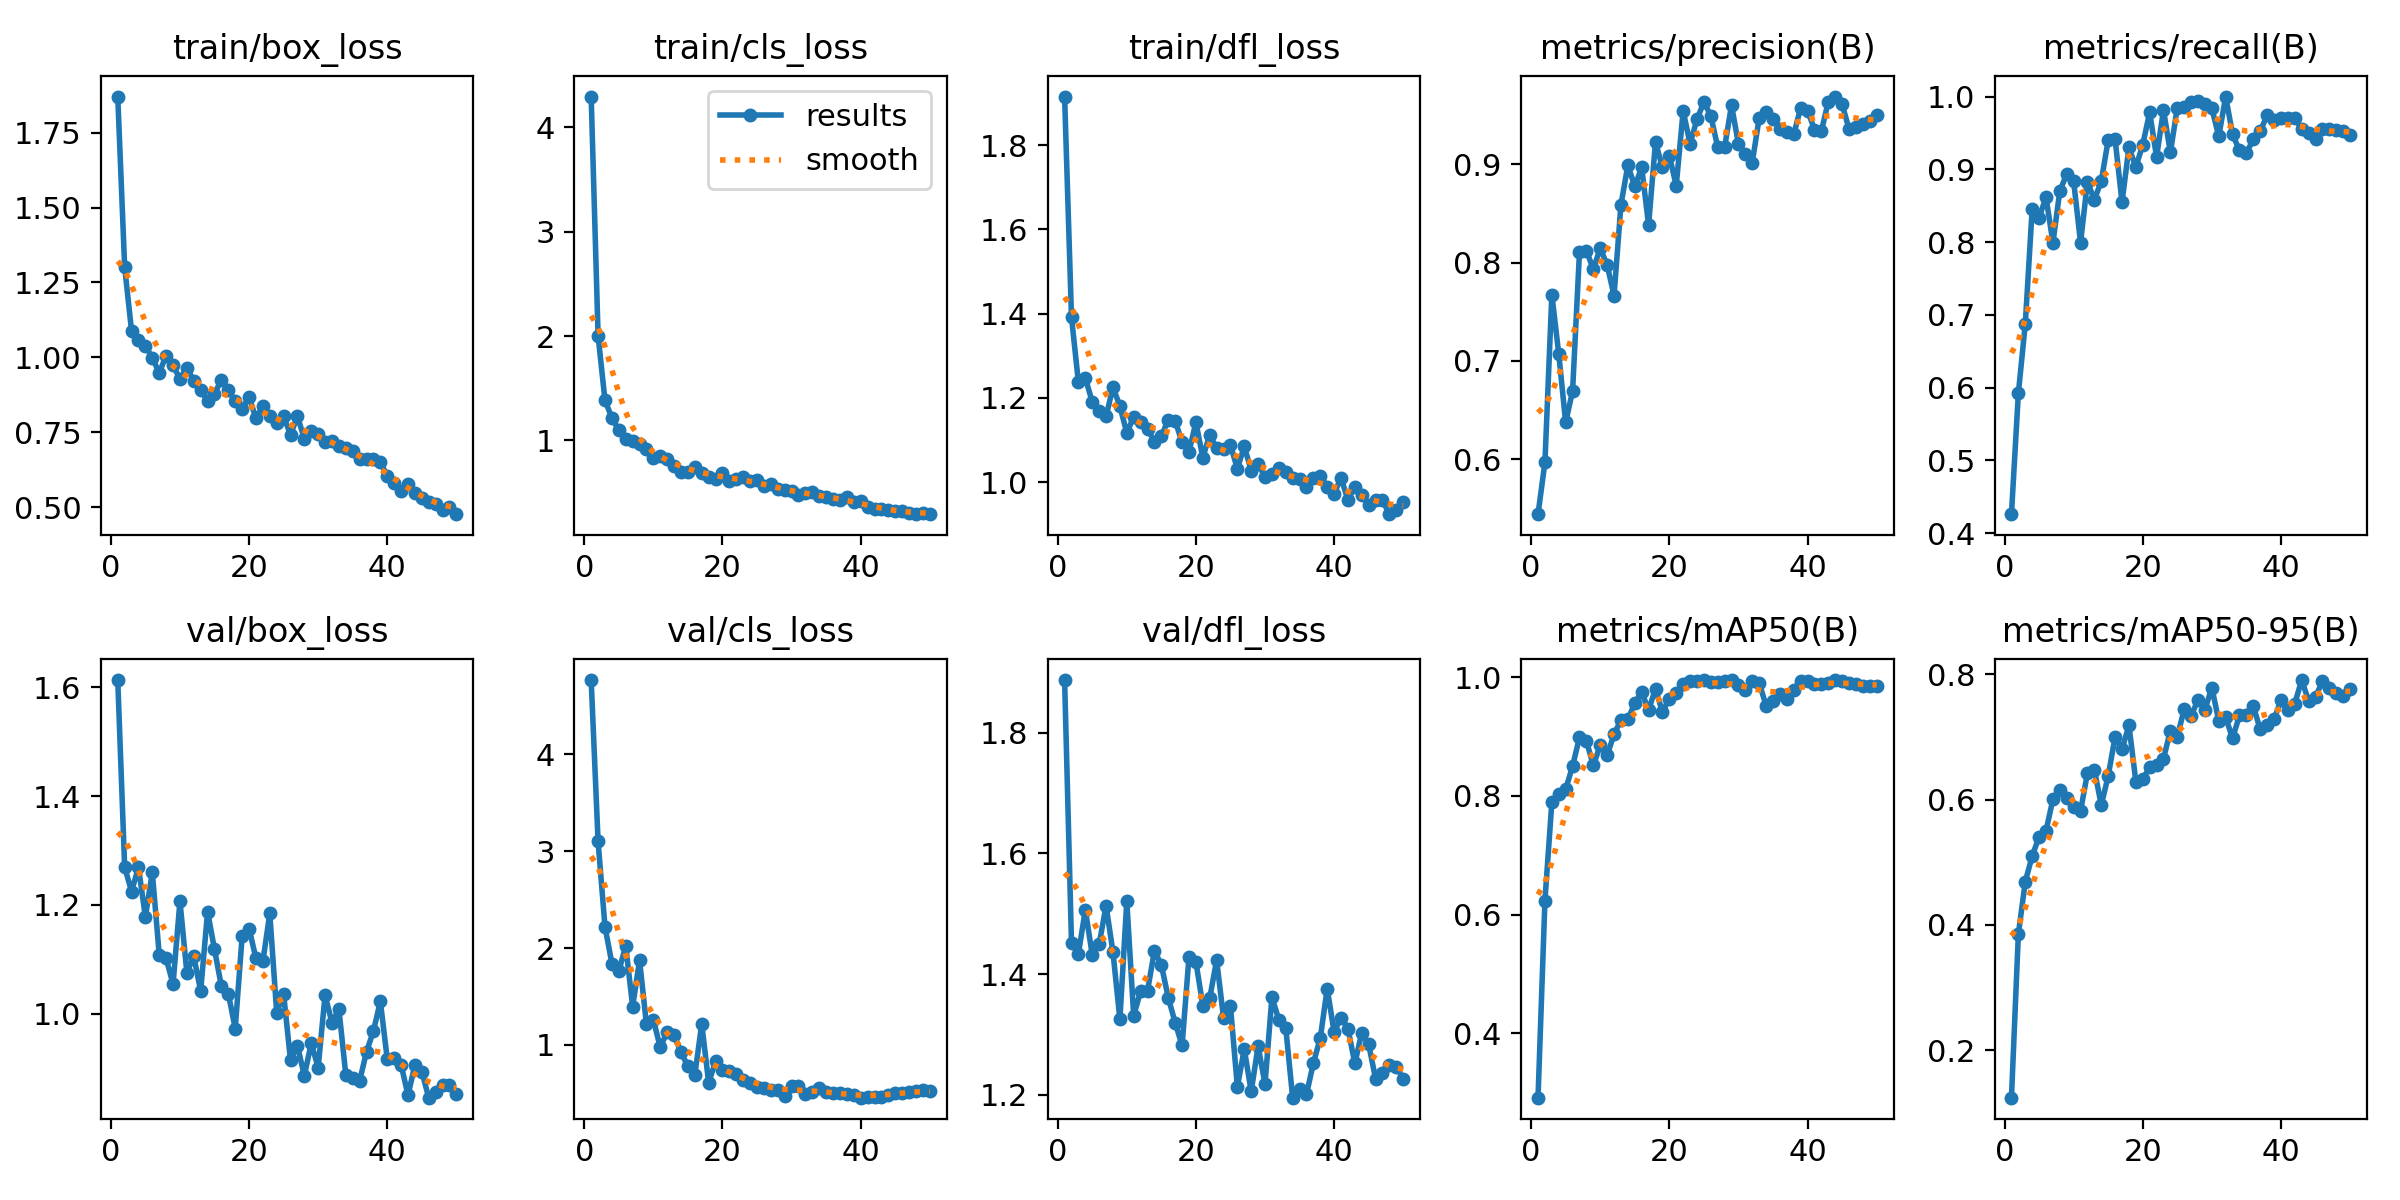

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

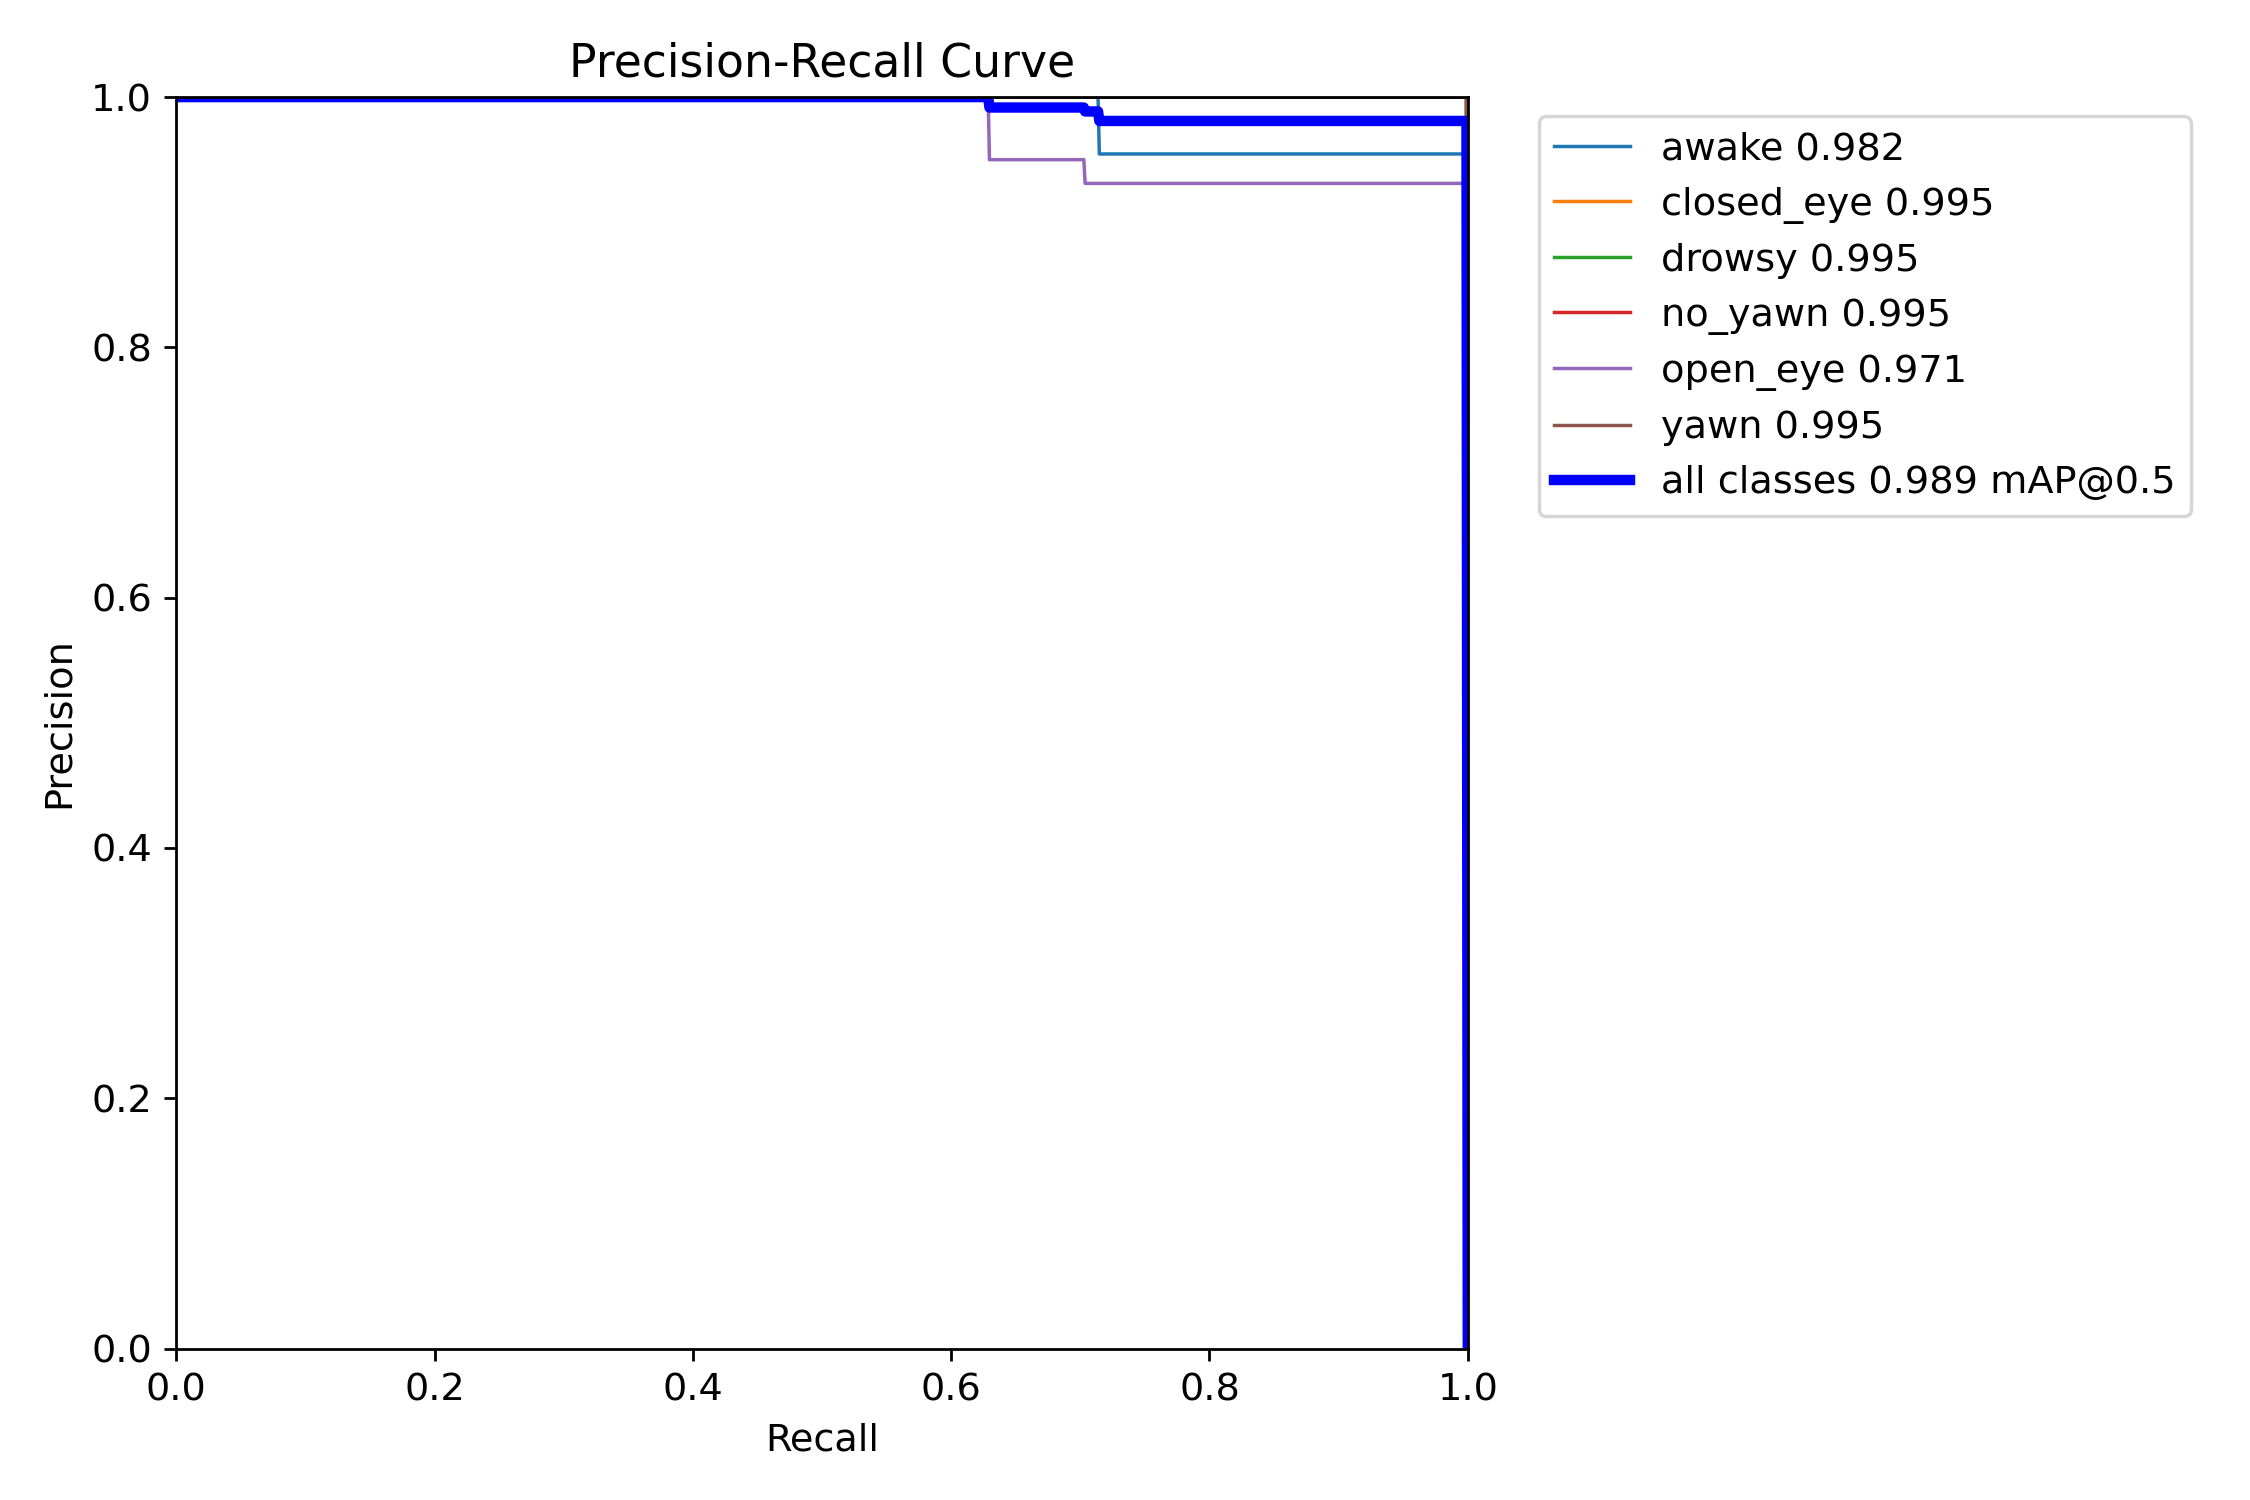

In [ ]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

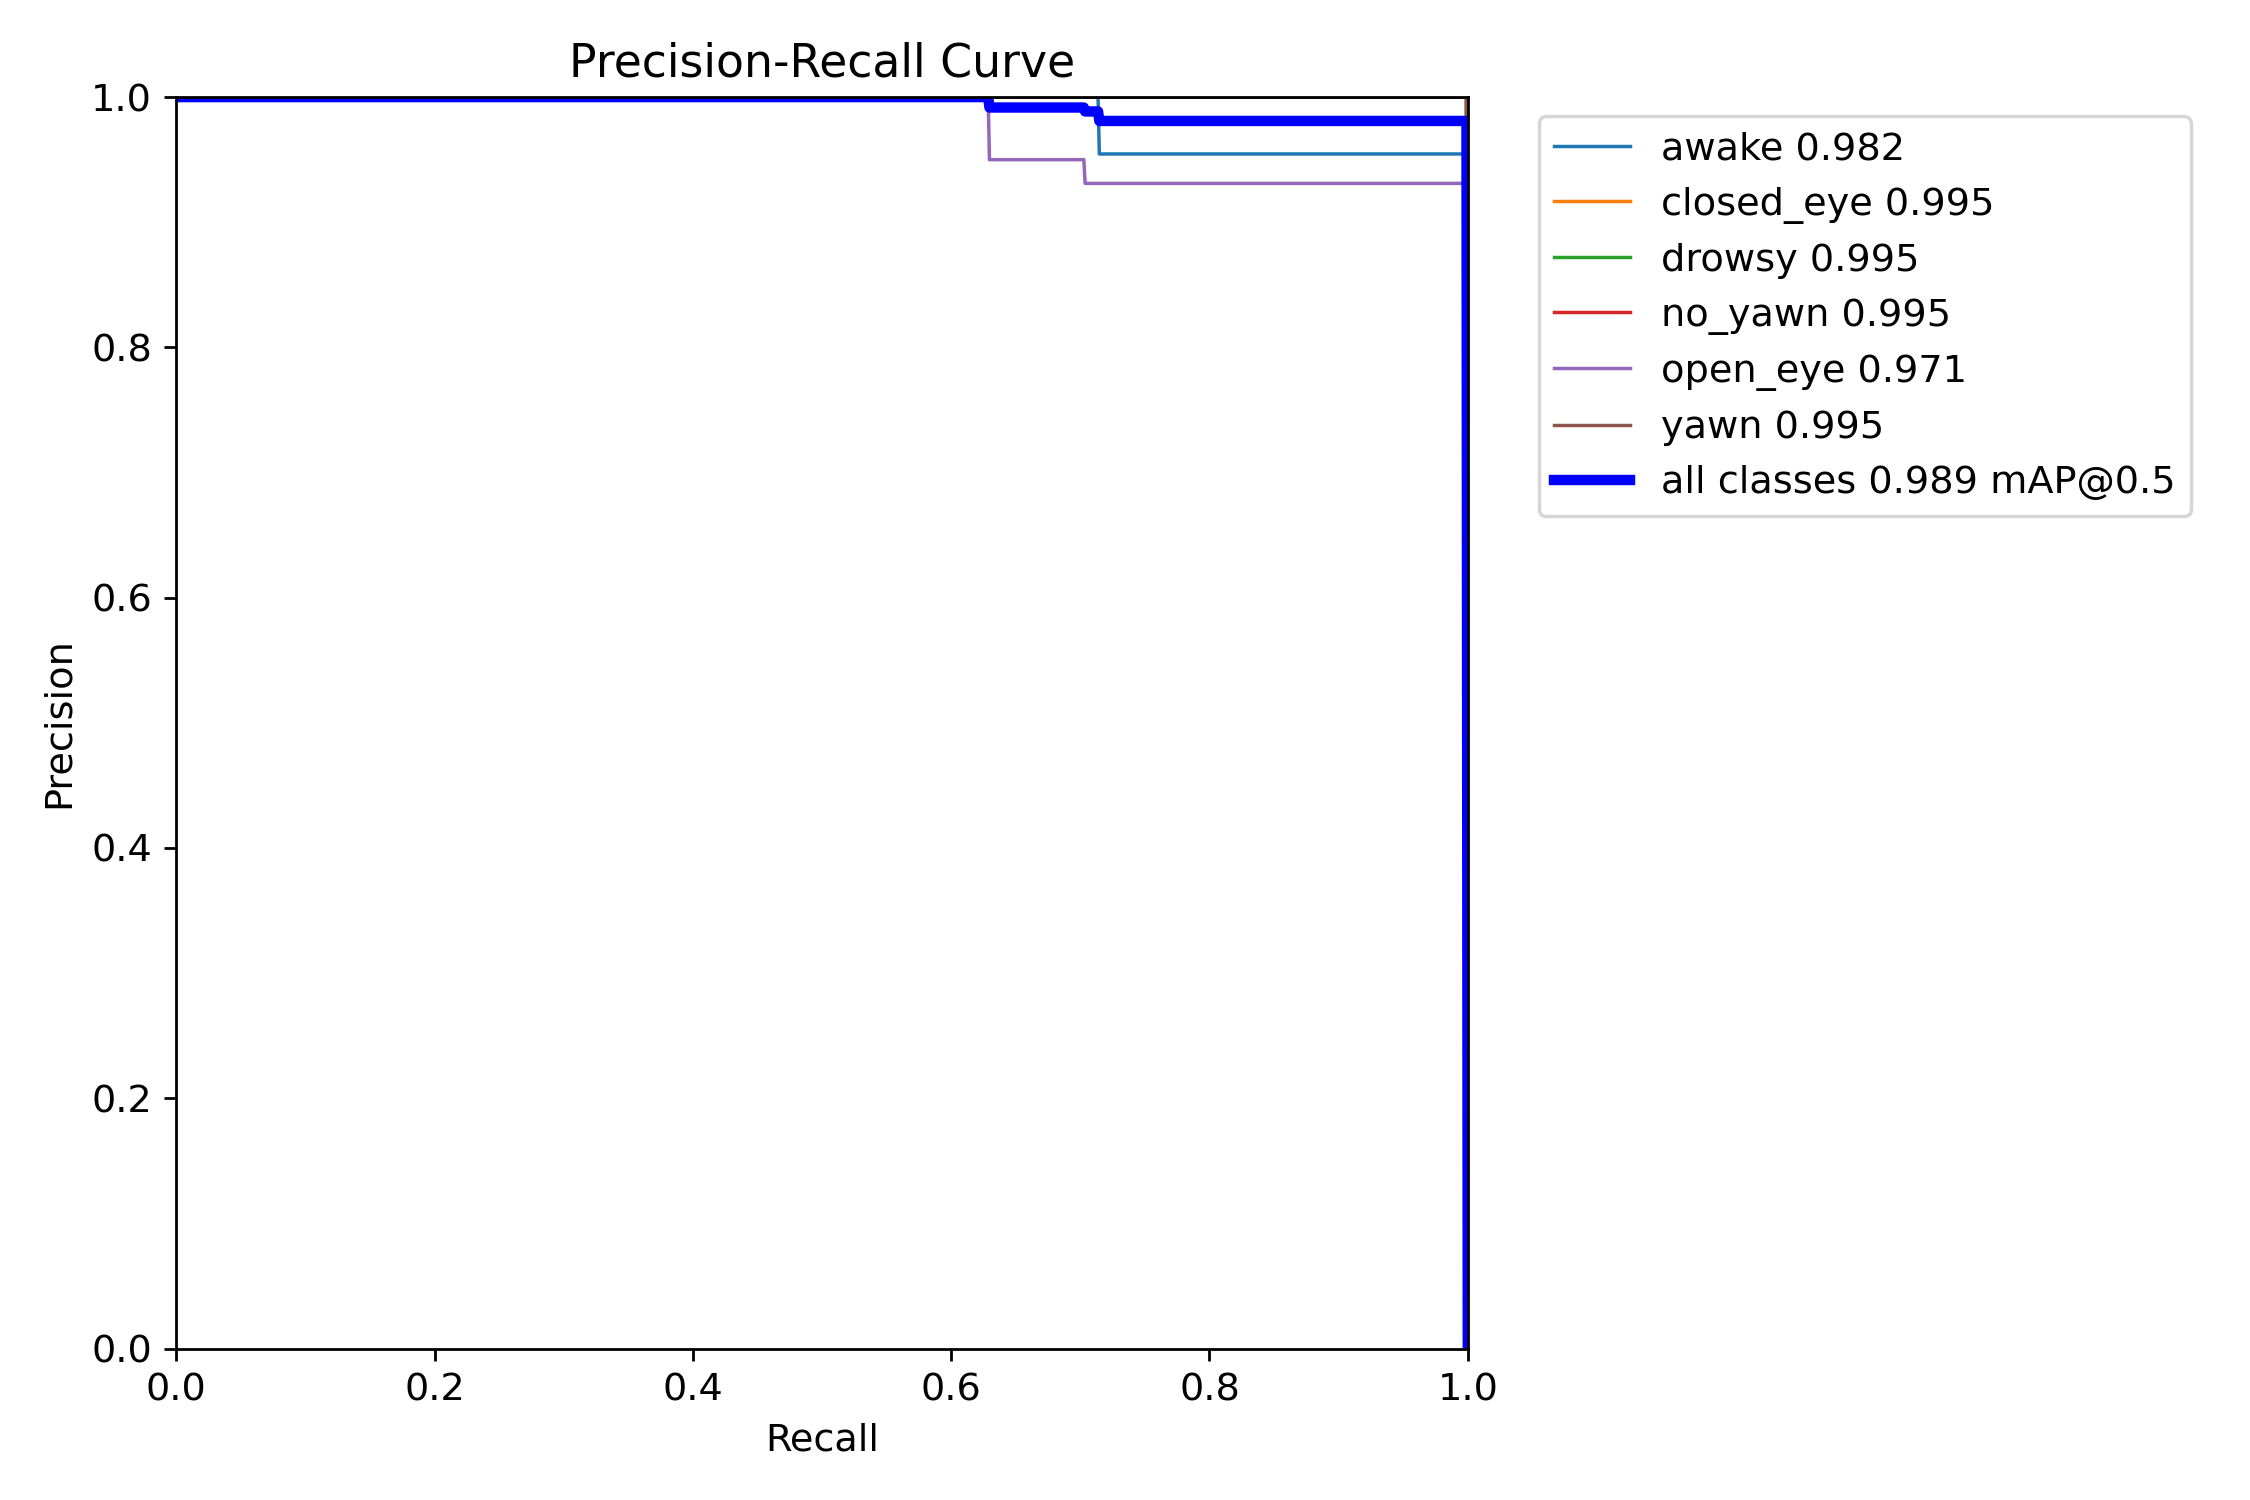

In [ ]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml  # we just specify the weights that we want to validation off / passing all images through our model for validation

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Drive-Drowsiness-Detection-2/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.18s/it]
                   all         36        108      0.964      0.955      0.989      0.787
                 awake         21         21      0.902          1      0.982      0.874
            closed_eye          9          9          1      0.786      0.995      0.707
                drowsy         15         15          1      0.945      0.995      0.942
               no_yawn         26         26      0.992          1      0.995      0.742
              open_eye         27         27      0.893          1      0.971      0.662
                  yawn         10

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

/bin/bash: line 1: yolo: command not found


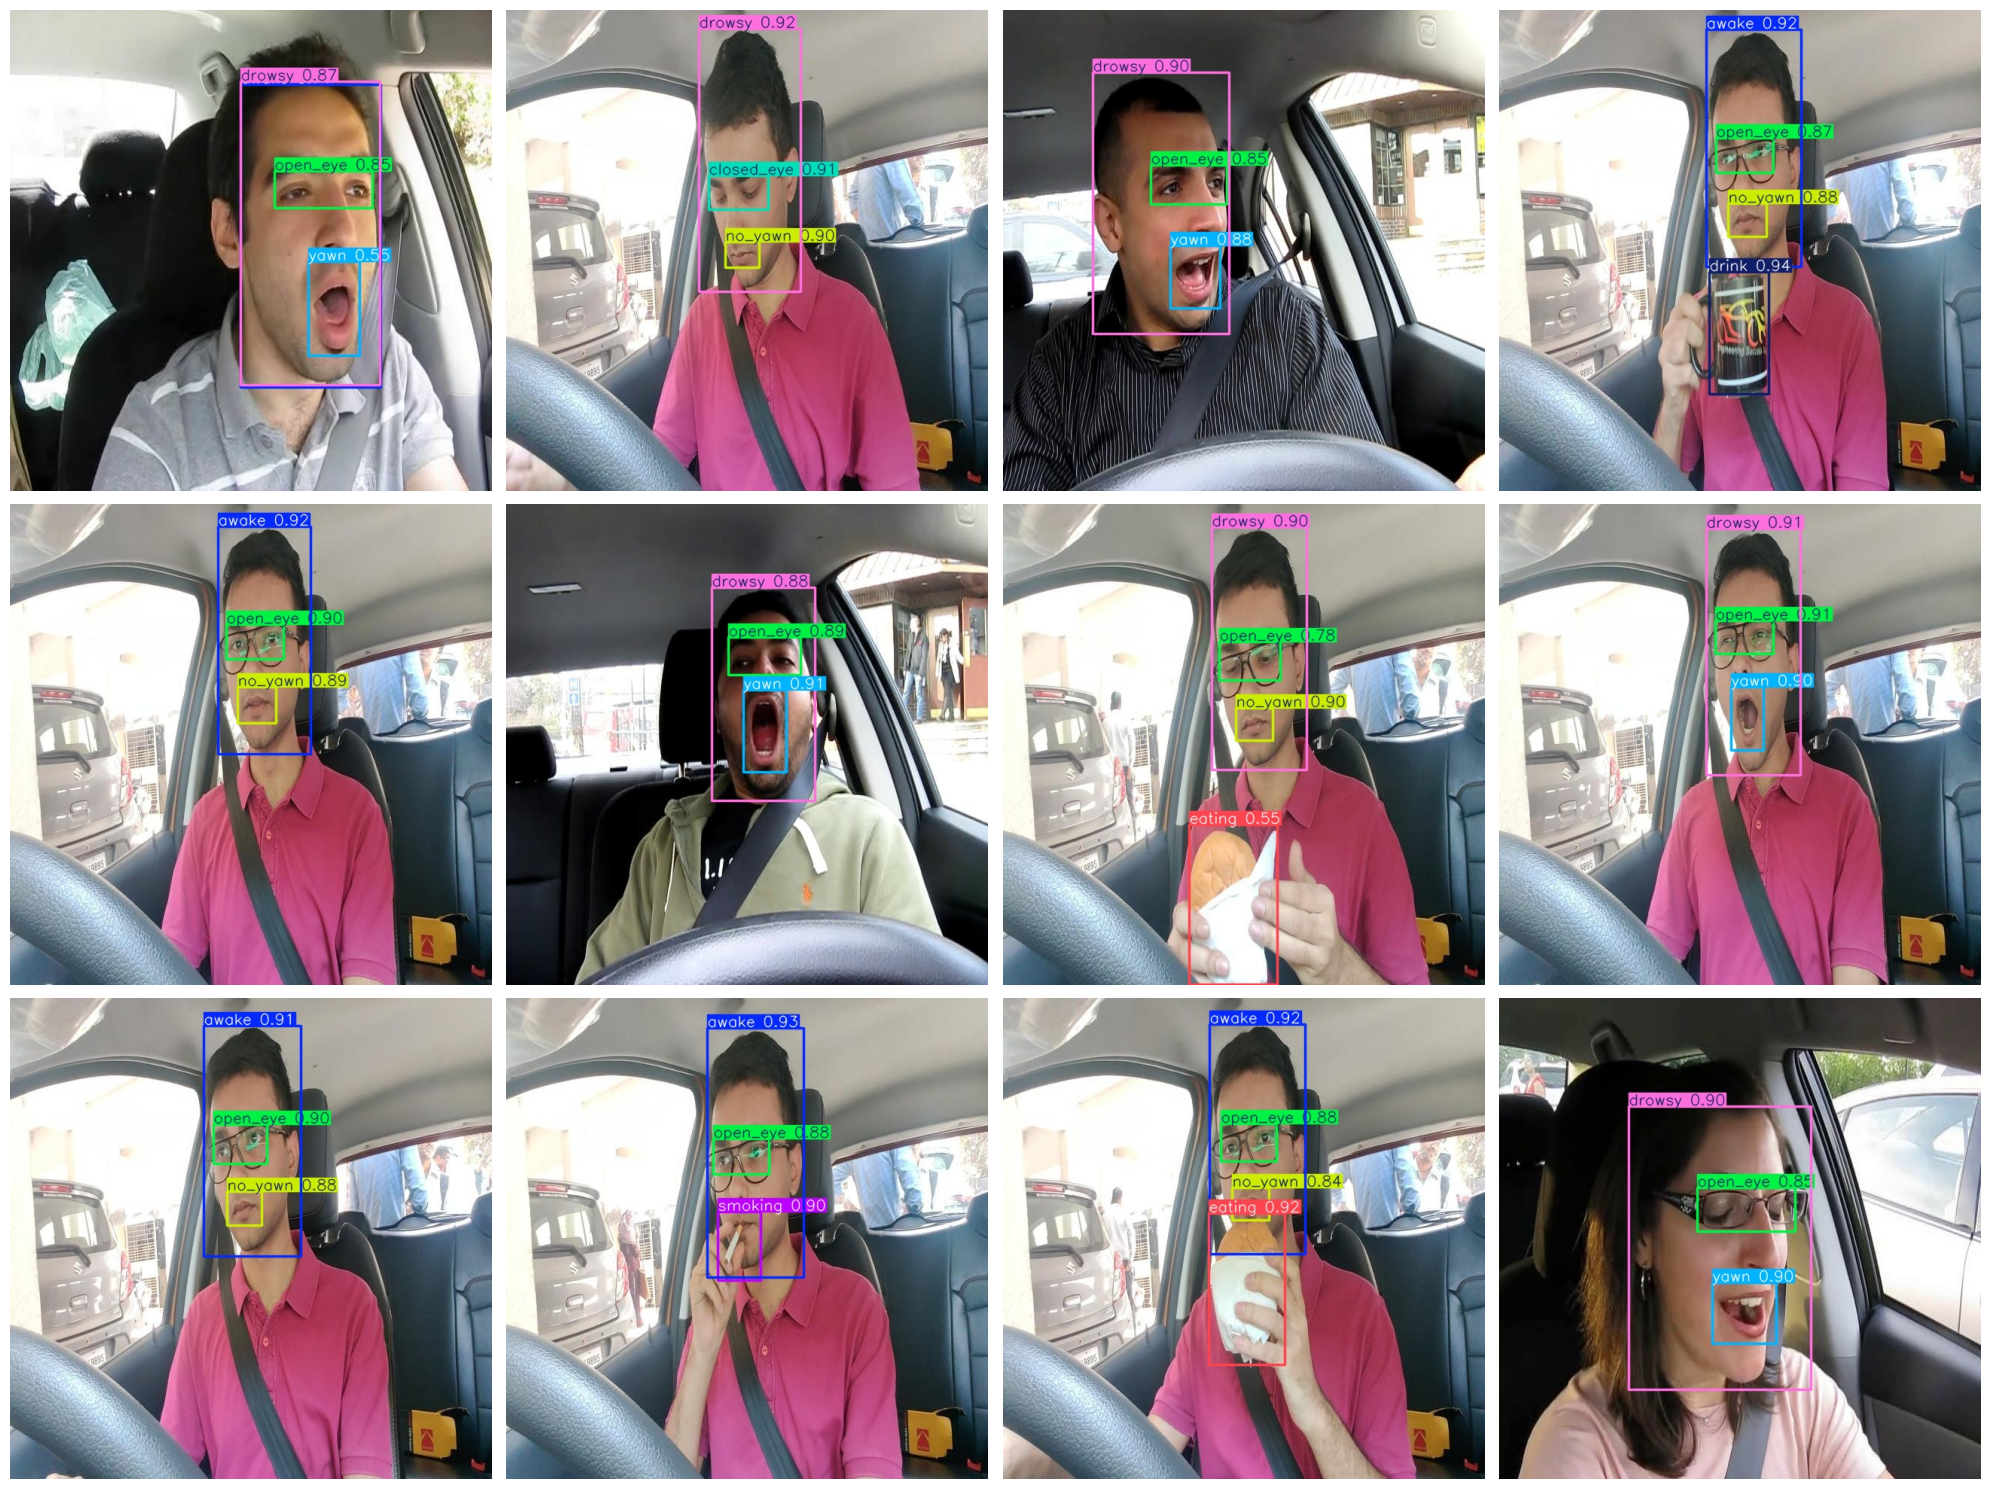

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/runs/detect/predict/*.jpg')[-12:]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
results = model.predict(source='/content/th.jpeg', conf=0.5)


image 1/1 /content/th.jpeg: 640x512 1 awake, 1 no_yawn, 32.3ms
Speed: 4.1ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'awake', 1: 'calling', 2: 'chatting', 3: 'closed_eye', 4: 'drink', 5: 'drowsy', 6: 'eating', 7: 'no_yawn', 8: 'open_eye', 9: 'smoking', 10: 'yawn'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[193, 218, 239],
         [193, 218, 239],
         [192, 217, 238],
         ...,
         [ 62,  57,  92],
         [ 62,  57,  92],
 

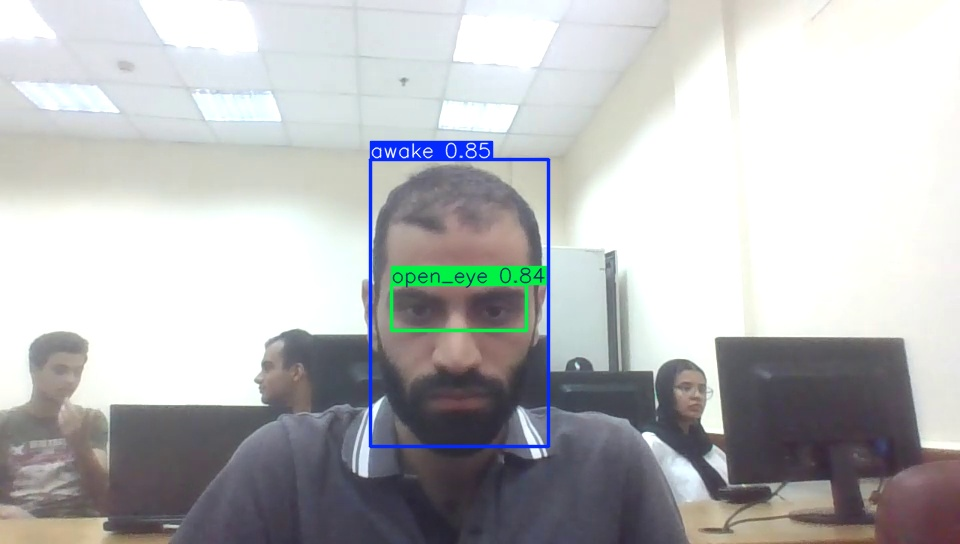

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import clear_output, Image, display
import time
i=280
for j in range(i):
        annotated_frame =  results[j].plot()

        # Display the annotated frame
        _, annotated_frame_encoded = cv2.imencode('.jpg', annotated_frame)
        display(Image(data=annotated_frame_encoded.tobytes()))
        clear_output(wait=True)
        time.sleep(0.05)

        # Write the annotated frame to the output video
        out.write(annotated_frame)


cap.release()
out.release()

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best.pt')
results = model.predict(source='/content/th.jpeg', conf=0.5)



image 1/1 /content/th.jpeg: 640x512 1 awake, 1 no_yawn, 93.3ms
Speed: 17.9ms preprocess, 93.3ms inference, 805.2ms postprocess per image at shape (1, 3, 640, 512)


In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialize bounding box to empty
bbox = ''
count = 0
model = YOLO('/content/best.pt')
while True:
    try:
        js_reply = video_frame(label_html, bbox)
        if not js_reply:
            break

        # convert JS response to OpenCV Image
        img = js_to_image(js_reply["img"])

        # YOLOv8 inference
        results = model(img)

        # Create transparent overlay for bounding boxes
        bbox_array = np.zeros([480,640,4], dtype=np.uint8)

        # Process YOLOv8 results
        for r in results:
            boxes = r.boxes
            for box in boxes:
                b = box.xyxy[0].tolist()  # get box coordinates in (top, left, bottom, right) format
                c = box.cls
                label = f'{model.names[int(c)]} {box.conf[0]:.2f}'
                color = (255, 0, 0)  # Blue color for bounding box

                # Draw bounding box
                bbox_array = cv2.rectangle(bbox_array, (int(b[0]), int(b[1])), (int(b[2]), int(b[3])), color, 2)

                # Add label
                cv2.putText(bbox_array, label, (int(b[0]), int(b[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        # convert overlay of bbox into bytes
        bbox_bytes = bbox_to_bytes(bbox_array)
        # update bbox so next frame gets new overlay
        bbox = bbox_bytes

    except Exception as e:
        print(f"An error occurred: {e}")
        break

print("Video stream has ended.")

<IPython.core.display.Javascript object>

An error occurred: name 'video_frame' is not defined
Video stream has ended.


-----------------------------